## MVIDIA, Task 6

Student: Tornike Onoprishvili

## Task 1

Explain why Graph Neural Networks (GNN) and Graph Convolutional Networks (GCN) 
are  necessary.  What  types  of  problems  do  they  excel  at  solving?  Apart  from  their 
applications in molecular structures, social networks, and literature citation relationships, 
can  you  provide  examples  of  other  types  of  data  that  can  be  abstracted  into  a  graph 
structure?

- The scale is everything nowadays, so the fact that GNNs scale well to large graph-based problems (like social networks, customer-product bipartite graphs, etc) is the fist reason. The reason for good scalability in GNNs lies in their ability to operate by aggregating information from local neighborhoods. Instead of processing the entire graph at once, GNNs perform computations iteratively, updating node representations by incorporating information from neighboring nodes. This localized processing approach allows GNNs to scale efficiently to large graphs with millions or even billions of nodes and edges.

- GNNs and GCNs are flexible and can handle graphs of different sizes and structures. They can adapt to various types of graphs, including directed, undirected, and heterogeneous graphs, making them suitable for a wide range of applications.

Here are the real-world services and tools what can be "abstracted into" a graph structure:
- Recommendation Systems: Graphs can represent user-item interactions, where nodes represent users and items, and edges represent interactions.
- Financial Networks: Financial transactions, banking networks, and stock market data can be modeled as graphs. GNNs can help detect fraud, for example.
- Supply Chain Networks: Supply chain logistics, including supplier relationships, transportation routes, and inventory flows, can be represented as graphs. GNNs can optimize supply chain operations, predict demand, and identify bottlenecks.



## Task 2

Based on the undirected  graph shown in  Figure 1, please write out its adjacency matrix, 
degree matrix, and Laplacian matrix.  


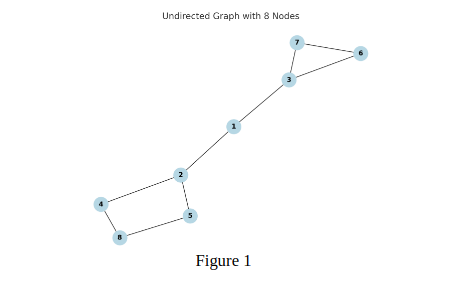

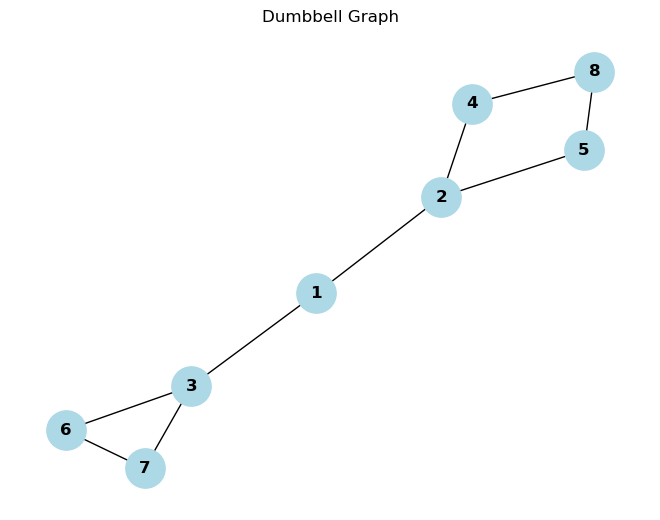

In [2]:
import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes 1 to 8
nodes = range(1, 9)
G.add_nodes_from(nodes)

# Add edges for the first bell
bell1_edges = [(1, 2), (2, 5), (5, 8), (8, 4), (4, 2)]
G.add_edges_from(bell1_edges)

# Add edges for the second bell
bell2_edges = [(1, 3), (3, 7), (7, 6), (6, 3)]
G.add_edges_from(bell2_edges)

# Connect bells
G.add_edge(1, 2)
G.add_edge(1, 3)

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_size=12, font_weight='bold')
plt.title("Dumbbell Graph")
plt.show()


In [18]:
# Print adjacency matrix
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

print("Adj Matrix:")
print(nx.linalg.adjacency_matrix(G).todense())

Adj Matrix:
[[0 1 1 0 0 0 0 0]
 [1 0 0 1 1 0 0 0]
 [1 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 1]
 [0 0 1 0 0 0 1 0]
 [0 0 1 0 0 1 0 0]
 [0 0 0 1 1 0 0 0]]


In [19]:
import networkx as nx
import numpy as np

degrees = dict(G.degree())

n = len(G.nodes())
degree_matrix = np.zeros((n, n))

for i, node in enumerate(G.nodes()):
    degree_matrix[i, i] = degrees[node]

print("Degree Matrix:")
print(degree_matrix)

Degree Matrix:
[[2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2.]]


In [20]:
laplacian_matrix = nx.laplacian_matrix(G).toarray()

print("Laplacian Matrix:")
print(laplacian_matrix)

Laplacian Matrix:
[[ 2 -1 -1  0  0  0  0  0]
 [-1  3  0 -1 -1  0  0  0]
 [-1  0  3  0  0 -1 -1  0]
 [ 0 -1  0  2  0  0  0 -1]
 [ 0 -1  0  0  2  0  0 -1]
 [ 0  0 -1  0  0  2 -1  0]
 [ 0  0 -1  0  0 -1  2  0]
 [ 0  0  0 -1 -1  0  0  2]]


## Task 3

Given the Laplacian matrixes below, please draw the corresponding graphs based on these 
matrixes.

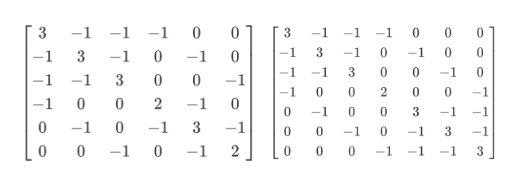

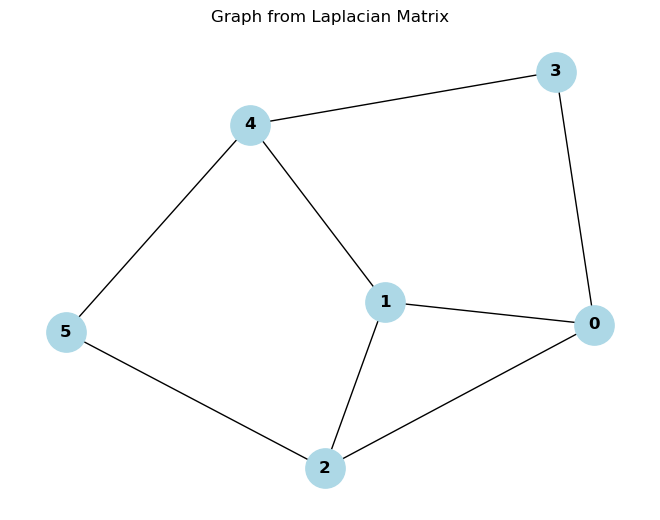

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def laplacian_to_graph(L):
    n = L.shape[0]  # Number of nodes
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i+1, n):
            if L[i, j] != 0:
                G.add_edge(i, j)
    
    return G

def plot_graph(G):
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_size=12, font_weight='bold')
    plt.title("Graph from Laplacian Matrix")
    plt.show()

L = np.array([
    3, -1, -1, -1, 0, 0,
    0, 3, -1,  0, -1, 0,
    0,  0,  3,  0, 0, -1,
    0,  0,  0,  2, -1, 0,
    0,  0,  0,  0,  3, -1,
    0,  0,  0,  0,  0,  2,
]).reshape(6,6)

L += np.triu(L, 1).T
# Convert Laplacian matrix to NetworkX graph
G = laplacian_to_graph(L)

# Plot the graph
plot_graph(G)

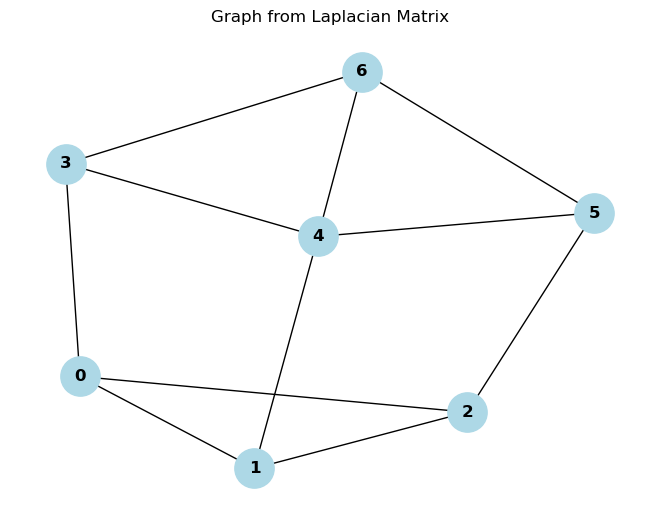

In [13]:
L = np.array([
    3, -1, -1, -1,  0,  0,  0,
    0,  3, -1,  0, -1,  0,  0,
    0,  0,  3,  0,  0, -1,  0,
    0,  0,  0,  2, -1,  0, -1,
    0,  0,  0,  0,  3, -1, -1,
    0,  0,  0,  0,  0,  3, -1,
    0,  0,  0,  0,  0,  0,  3,
]).reshape(7,7)

L += np.triu(L, 1).T
# Convert Laplacian matrix to NetworkX graph
G = laplacian_to_graph(L)

# Plot the graph
plot_graph(G)

## Task 4

Create  a  graph  containing  at  least  7  nodes.  Draw  this  graph,  and  calculate  its  adjacency 
matrix. Then, input your result for the adjacency matrix into the corresponding commented 
section of the code provided in the Colab link. Once  completed, run the  first part of the 
code in Colab to check if the graph you have drawn is consistent with the graph generated 
by  the  program.  Please  explain  the  second  part  of  the  code  and  give  the  mathematical 
formulas corresponding to the key steps.

[colab link](https://colab.research.google.com/drive/1zVcYogIwrPfy3tUUD3dZEuqKV8x84iuH?usp=sharing).

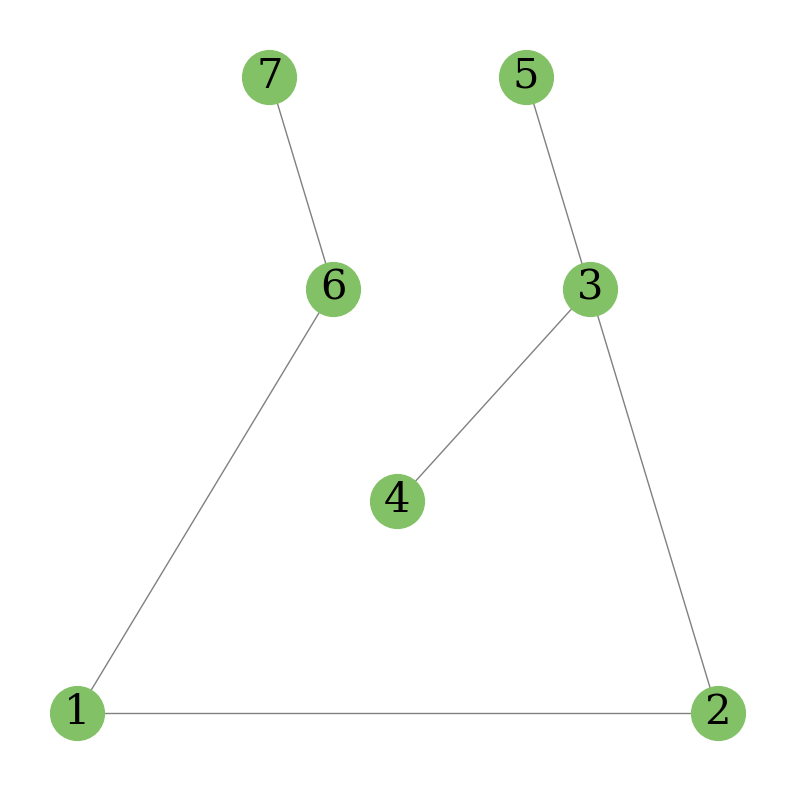

In [17]:
import numpy as np
from scipy.linalg import sqrtm
from scipy.special import softmax
import networkx as nx
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Fill in your adjacency matrix in A, where 'row' represents the current node, and 'col' represents the neighbor node. Below is an example.
A = np.array(
    [[0, 1, 0, 0, 0, 1, 0],
     [1, 0, 1, 0, 0, 0, 0],
     [0, 1, 0, 1, 1, 0, 0],
     [0, 0, 1, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0, 0],
     [1, 0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 1, 0]])

# node features
feats = np.arange(A.shape[0]).reshape((-1,1))+1

# Create graph
g = nx.from_numpy_array(A)
node_labels = {i: i+1 for i in range(g.number_of_nodes())}
pos = nx.planar_layout(g)
fig, ax = plt.subplots(figsize=(10,10))
nx.draw(
    g, pos, with_labels=True,
    labels=node_labels,
    node_color='#83C167',
    ax=ax, edge_color='gray', node_size=1500, font_size=30, font_family='serif'
)
plt.savefig('simple_graph.png', bbox_inches='tight', transparent=True)

In [21]:
feats

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [18]:
# Explain this part
H = A @ feats
D = np.zeros(A.shape)
np.fill_diagonal(D, A.sum(axis=0))
D_inv = np.linalg.inv(D)
H_avg = D_inv @ A @ feats

A_tilde= A + np.eye(A.shape[0])

# D for A_tilde:
D_tilde = np.zeros_like(A_tilde)
np.fill_diagonal(D_tilde, A_tilde.sum(axis=1).flatten())

# Inverse square root of D:
D_tilde_invroot = np.linalg.inv(sqrtm(D_tilde))

# A_hat
A_hat = D_tilde_invroot @ A_tilde @ D_tilde_invroot

H = np.zeros((g.number_of_nodes(), 1))
H[0,0] = 1 # Only one node contains information
iters = 10
results = [H.flatten()]
for i in range(iters):
    H = A_hat @ H
    results.append(H.flatten())

The main line here is `A_hat = D_tilde_invroot @ A_tilde @ D_tilde_invroot`. What we are doing is we are making sure that `A_hat`, when taken to any matrix power, doesn't explode. i.e. we are normalizing it. 

Let's make sure this is correct:

In [36]:
x = A_hat
for _ in range(100):
    x = x @ A_hat
assert np.isfinite(x).all()
print(x)

[[0.1578985  0.15789372 0.18231476 0.12891499 0.12891499 0.15790224
  0.12892802]
 [0.15789372 0.15789501 0.18232287 0.12892201 0.12892201 0.1578927
  0.12891848]
 [0.18231476 0.18232287 0.21053712 0.14887394 0.14887394 0.18230841
  0.14885186]
 [0.12891499 0.12892201 0.14887394 0.10527126 0.10527126 0.12890949
  0.10525214]
 [0.12891499 0.12892201 0.14887394 0.10527126 0.10527126 0.12890949
  0.10525214]
 [0.15790224 0.1578927  0.18230841 0.12890949 0.12890949 0.15790972
  0.12893549]
 [0.12892802 0.12891848 0.14885186 0.10525214 0.10525214 0.12893549
  0.10527813]]


Next, we have a vector `H` that is used to simulate node-neighborhood aggregation. 

Each entry $H_i$ in the vector represents the learned representation or embedding of node $i$ in the graph. These representations capture the structural and/or semantic information of the nodes within the graph.

In [43]:
H

array([[0.1832301 ],
       [0.15337086],
       [0.14208524],
       [0.0934155 ],
       [0.0934155 ],
       [0.20451859],
       [0.17424158]])

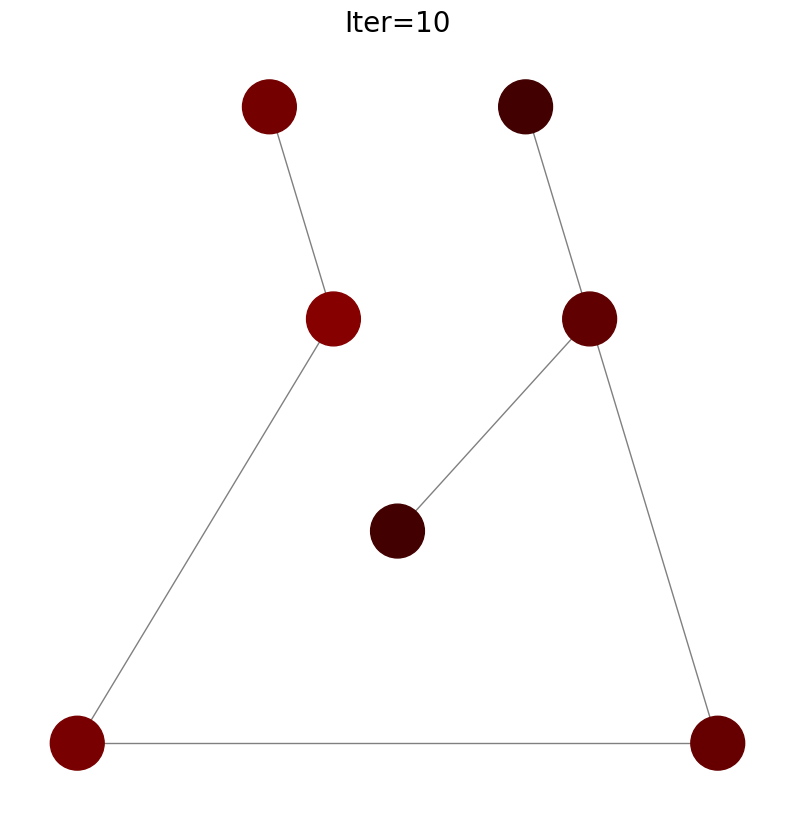

In [42]:
# visualization
fig, ax = plt.subplots(figsize=(10, 10))

kwargs = {'cmap': 'hot', 'node_size': 1500, 'edge_color': 'gray',
          'vmin': np.array(results).min(), 'vmax': np.array(results).max()*1.1}

def update(idx):
    ax.clear()
    colors = results[idx]
    nx.draw(g, pos, node_color=colors, ax=ax, **kwargs)
    ax.set_title(f"Iter={idx}", fontsize=20)

anim = animation.FuncAnimation(fig, update, frames=len(results), interval=1000, repeat=True)

writergif = animation.FFMpegWriter()
anim.save('test.gif',writer=writergif)
HTML(anim.to_html5_video())

In [44]:
! jupyter-nbconvert --to pdf main.ipynb

[NbConvertApp] Converting notebook main.ipynb to pdf
[NbConvertApp] Support files will be in main_files/
[NbConvertApp] Making directory ./main_files
[NbConvertApp] Writing 48529 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 224420 bytes to main.pdf
